# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
# The dataset represents 17 marketing cpanaings conducted between May 2008 and November 2010.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
1+1

2

In [2]:
import pandas as pd

In [4]:
import os
os.listdir("data")


['bank-additional-full.csv',
 'bank-additional-names.txt',
 'bank-additional.csv']

In [5]:
df = pd.read_csv("data/bank-additional-full.csv", sep=";")

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [7]:
df.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
''' 
After evaluating the dataset using df.isna().su,() and df.info(), we can conclude that there are no true missing values in the dataset. However, several categorical variables 
(job, marital, education, default, housing, loan) use 'unknown' as a placeholder and should be treated as missing during preprocessing. All categorical variables are currently 
stored as object and should be converted to a category type. In addition, duration should be excluded from modeling if the intention is to have a realistic model and pdays uses 
999 as a value indicating that the client was not previously contacted.
'''

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
'''
The goal is to predict a machine learning model that predicts which clients are most likely to subscribe to a long term deposit, so the marketing team can target future campaigns more 
efficiently, reduce unnecessary contacts, and improve overall success rate leading to an increase in overall efficiency.
'''

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
# Bank features to be used for modeling
bank_features = [
    'age', 'job', 'marital', 'education',
    'default', 'housing', 'loan'
]

X = df[bank_features]
y = df['y']


In [10]:
# Replacing 'unknown' with None to indicate missing values
X = X.replace('unknown', None)

In [11]:
# One-hot encoding categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

In [12]:
# Final feature set and target variable
y_final = y.map({'yes': 1, 'no': 0})
X_final = X_encoded

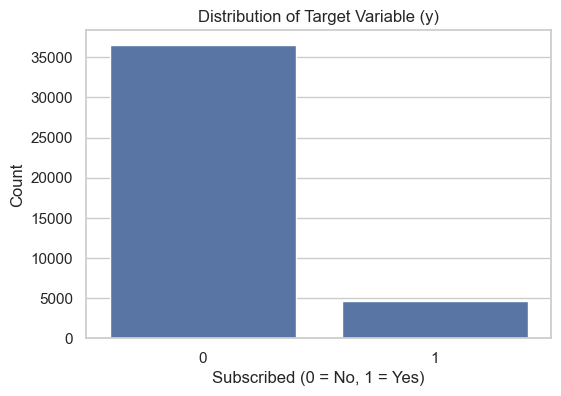

In [24]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot for the target variable distribution
plt.figure(figsize=(6,4)) 
sns.countplot(x=y_final) 
plt.title("Distribution of Target Variable (y)") 
plt.xlabel("Subscribed (0 = No, 1 = Yes)") 
plt.ylabel("Count") 
plt.show()

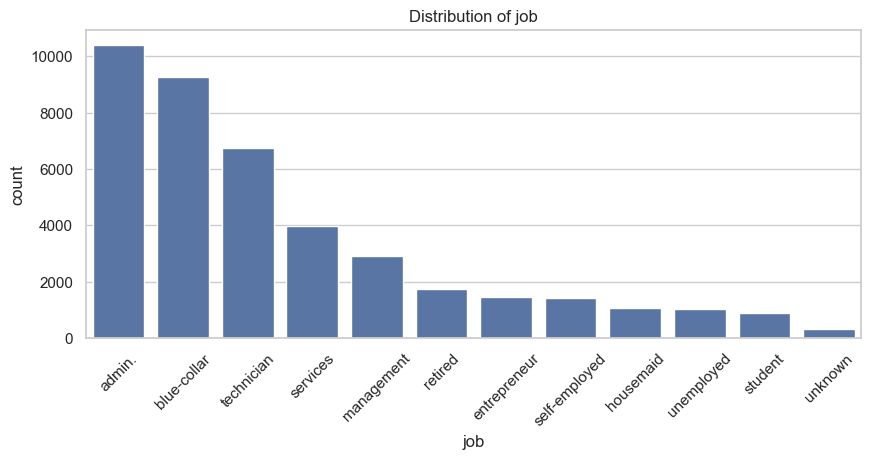

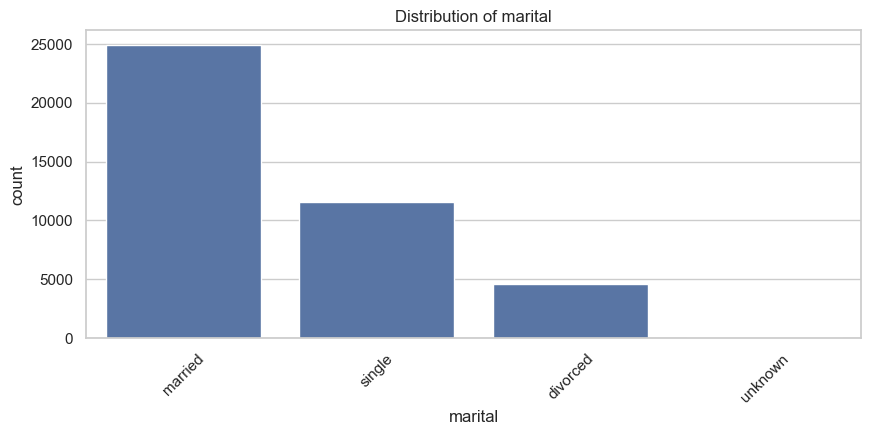

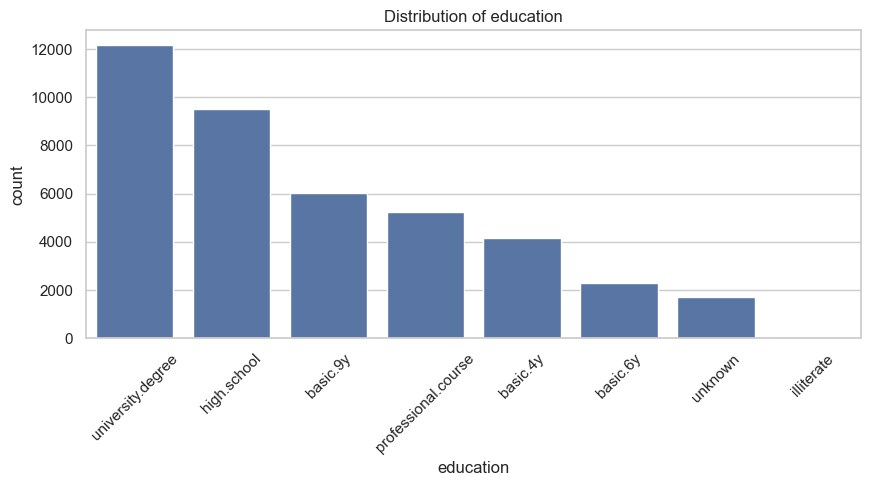

In [25]:
categorical_cols = ['job', 'marital', 'education']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

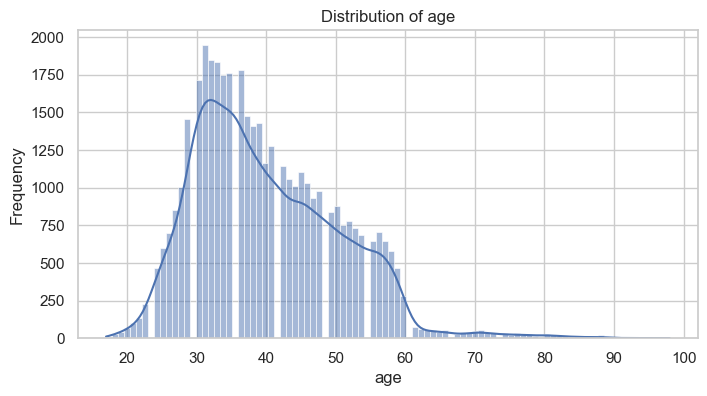

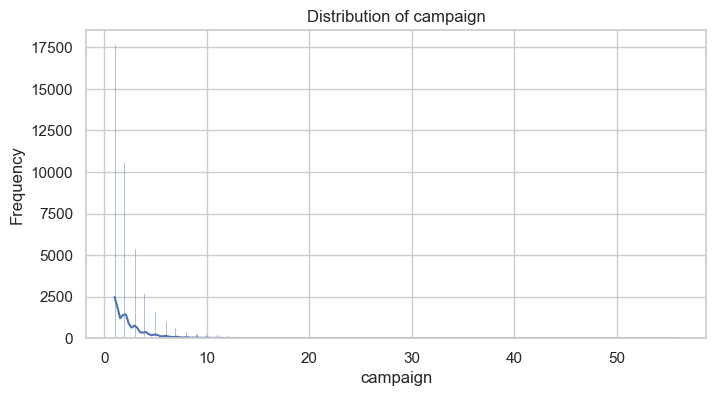

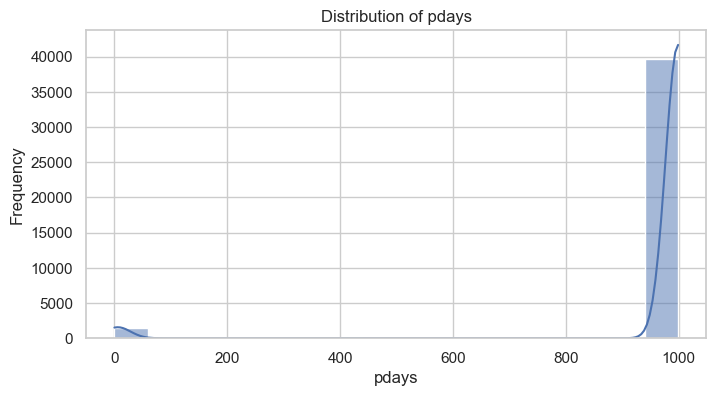

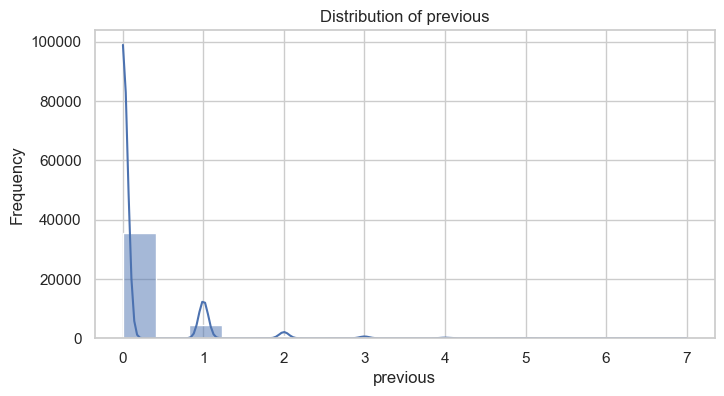

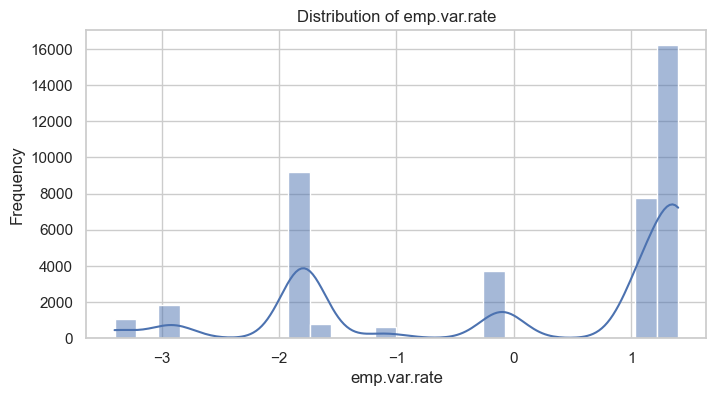

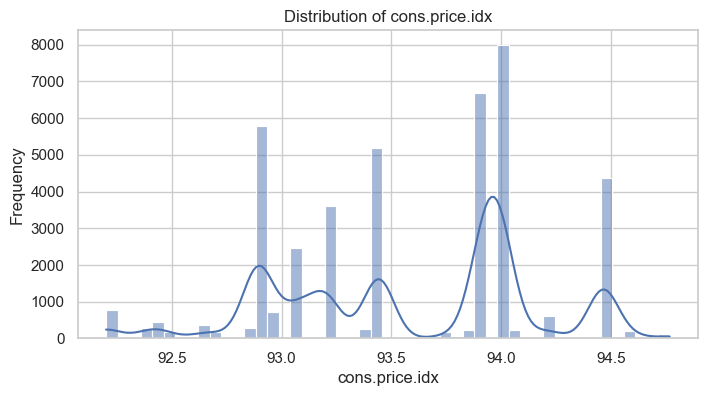

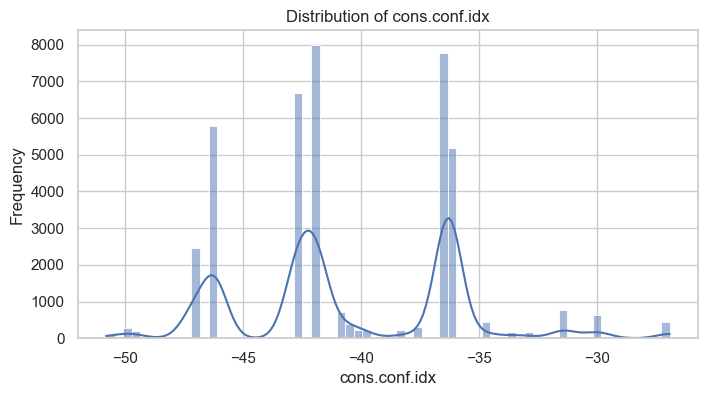

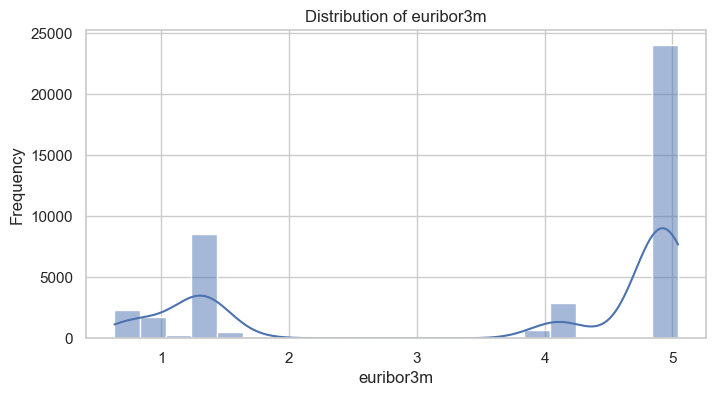

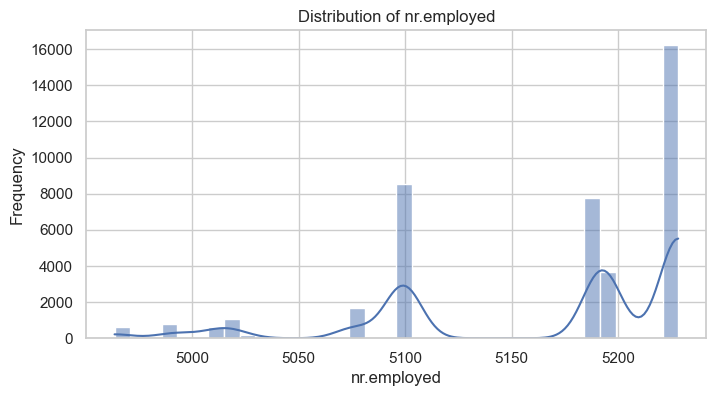

In [27]:
continuous_cols = [
    'age',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

for col in continuous_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


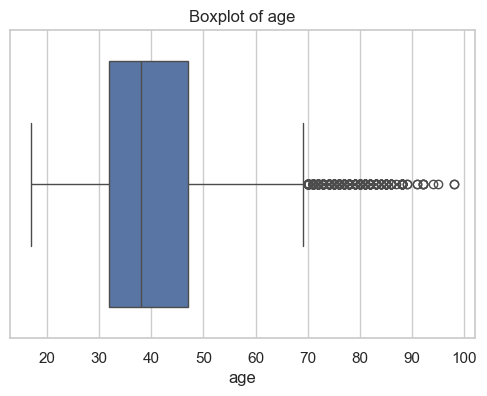

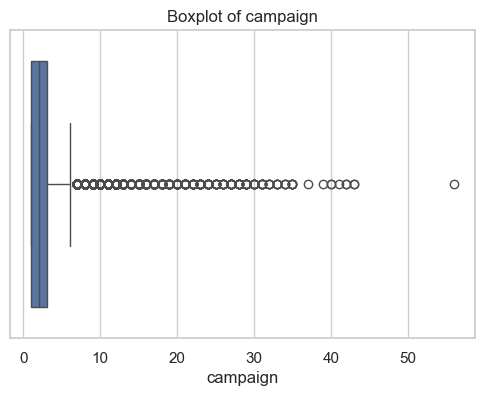

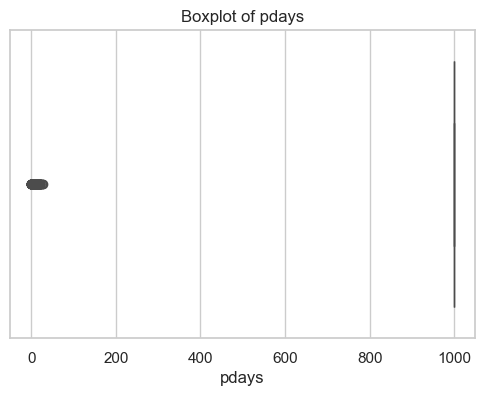

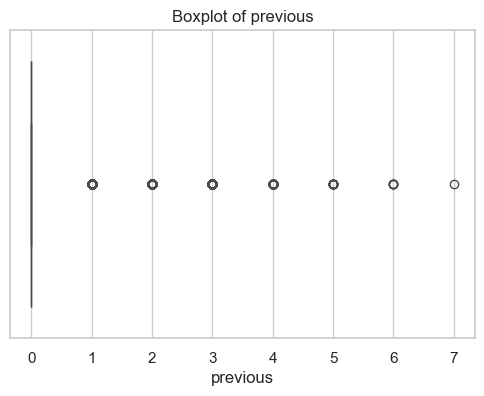

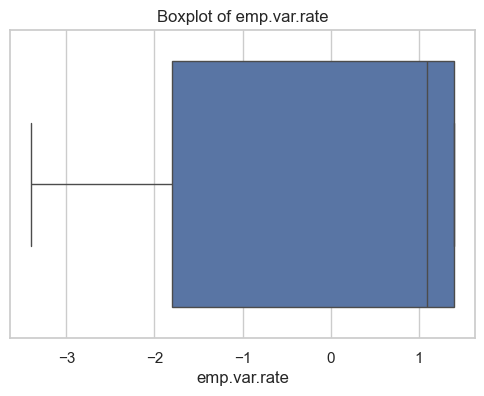

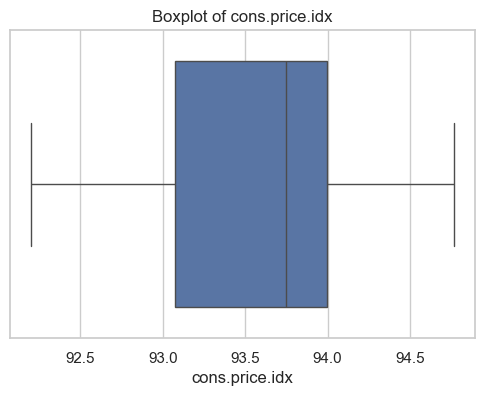

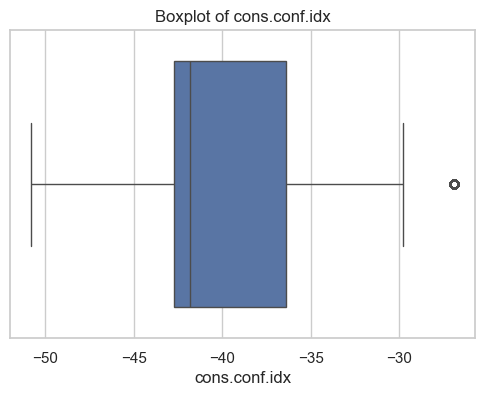

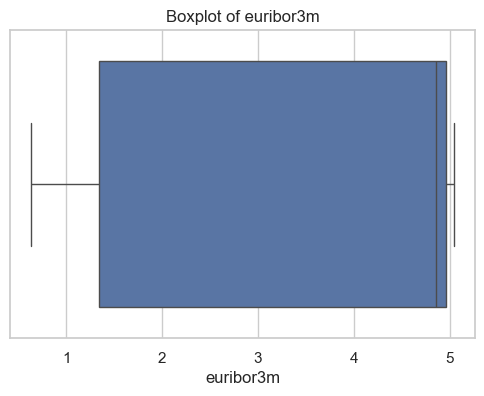

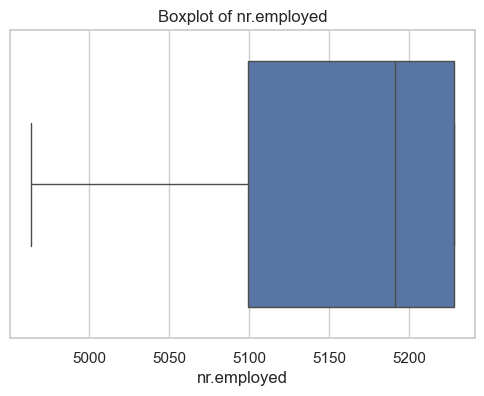

In [28]:
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final,
    y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final
)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
y_final.value_counts(normalize=True)

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64

In [ ]:
# The baseline accuracy is approximately 88.7%, which represets the percentage of clients that said no while approximately 11.3% said yes, making the baseline accuracy about 88.7%.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# Building the model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Evaluate the model on the test data
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.8873512988589464

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
# The accuracy of the logisti regression model is approximately 88.73%.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [19]:
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

In [20]:
results = []

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    train_time = end - start
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    results.append([name, train_time, train_acc, test_acc])

df_results = pd.DataFrame(results, columns=["Model", "Train Time", "Train Accuracy", "Test Accuracy"])
df_results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.294602,0.887344,0.887351
1,KNN,0.007007,0.890956,0.877397
2,Decision Tree,0.083158,0.909226,0.871449
3,SVM,9.426826,0.887344,0.887351


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# The performance of the model can be improved by hyperparameter tunning and by adjusting performance metrics. Details are listed below:

In [ ]:
# Hyperparameter Tunning
'''
We can apply hyperparameter tuning that influence how the model learns. For example, KNN performance depends on the number of nearest neighbors. A Decision Tree can be improved by controlling 
its maximum depth or minimum samples per split, and models like Logistic Regression and SVM benefit from tuning regularization strength or kernel parameters. Using tools such as grid or 
randomized search allows to assess and identify optimal erforming configurations.
'''

In [ ]:
# Performance Metrics
'''
Performance metrics can also be adjusted. In this case, since the dataset is not balanced, accuracy by itself is not a reliable indicator of model quality. Metrics such as precision, recall, 
F1‑score, and ROC‑AUC provide a more accurate assessment of how well the model identifies the minority class (in this case, “yes”), which better aligns with the business objective of 
predicting long term deposit subscribers.
'''

##### Questions